#DCT-based Image Compression

Here we explore image compression using the Discrete Cosine Transform, as is used in some JPEG compression algorithms. Let's install graph learning and load the image.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import matplotlib.pyplot as plt

In [1]:
pip install -q graphlearning

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

# import opencv
import cv2
  
# Load the input image
image = cv2.imread('C:/Users/user/Downloads/man1.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)

-1

In [13]:
from PIL import Image
img = Image.open('C:/Users/user/Downloads/man1.jpg').convert('L')
img.save('mangrey.png')

In [14]:
img = Image.open('mangrey.png')

In [15]:
img.show()

In [16]:
image = cv2.imread('C:/Users/user/Downloads/mangrey.png')

Data type: float32
Pixel intensity range: (0,1)
(1280, 720)


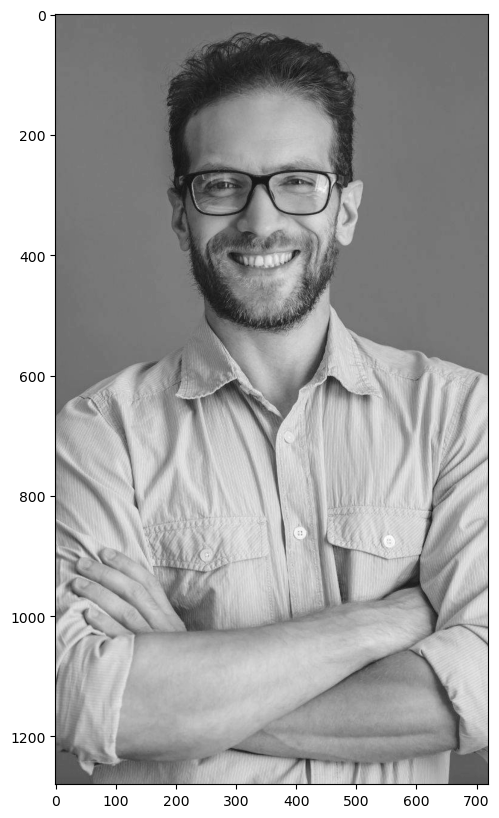

In [17]:
import matplotlib.pyplot as plt
#github = 'https://github.com/jwcalder/TestImages/raw/main/'
image = 'C:/Users/user/Downloads/mangrey.png'

#Load image
I = plt.imread(image)
plt.figure(figsize=(10,10))
plt.imshow(I,cmap='gray')

#Check data type of image
print('Data type: '+str(I.dtype))
print('Pixel intensity range: (%d,%d)'%(I.min(),I.max()))

#Print image shape
print(I.shape)

Python does not have a 2D DCT or inverse DCT, so we have to write our own functions.

In [18]:
from scipy.fftpack import dct
from scipy.fftpack import idct
import numpy as np

def dct2(f):
    """2D Discrete Cosine Transform

    Args:
        f: Square array

    Returns: 
        2D DCT of f
    """
    return dct(dct(f, axis=0, norm='ortho' ),axis=1, norm='ortho')




def idct2(f):
    """2D Inverse Discrete Cosine Transform

    Args:
        f: Square array

    Returns: 
        2D Inverse DCT of f
    """
    return idct(idct(f, axis=0 , norm='ortho'), axis=1 , norm='ortho')

    

We now view the DCT basis images for 8x8 image patches.

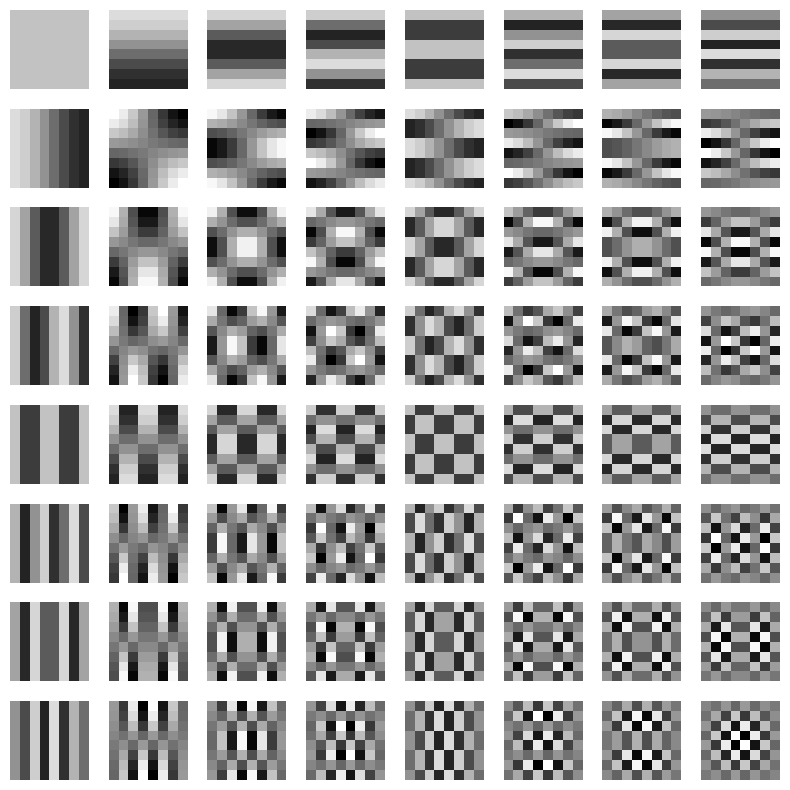

In [19]:
import graphlearning as gl

dct_basis = np.zeros((64,64))
k = 0
for i in range(8):
    for j in range(8):
        g = np.zeros((8,8))
        g[i,j]=1
        dct_basis[k,:] = idct2(g).flatten()
        k+=1

dct_basis = dct_basis/np.max(np.absolute(dct_basis))
gl.utils.image_grid(dct_basis,n_rows=8,n_cols=8)
        

Let's now take the DCT of the patches in the image.



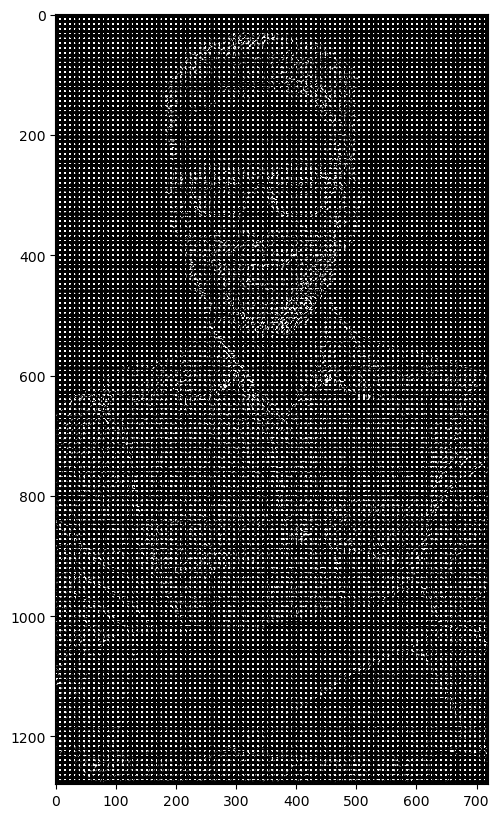

In [20]:
patch_size = 8  #8x8 patch
I_dct = np.zeros_like(I)
for i in range(0,I.shape[0],patch_size):
    for j in range(0,I.shape[1],patch_size):
        I_dct[i:(i+patch_size),j:(j+patch_size)] = dct2(I[i:(i+patch_size),j:(j+patch_size)])

plt.figure(figsize=(10,10))
plt.imshow(I_dct,cmap='gray',vmin=0,vmax=np.max(I_dct)*0.01)


Let's now compress the image by thresholding the smaller coefficients to zero.

In [21]:
thresh = 0.1
I_thresh = I_dct * (np.absolute(I_dct) > thresh*np.max(np.absolute(I_dct)))

We now decompress the image by taking the inverse DCT.

Keeping 1.61% of DCT coefficients
Compression ratio: 62.3:1
PSNR: 27.79 dB


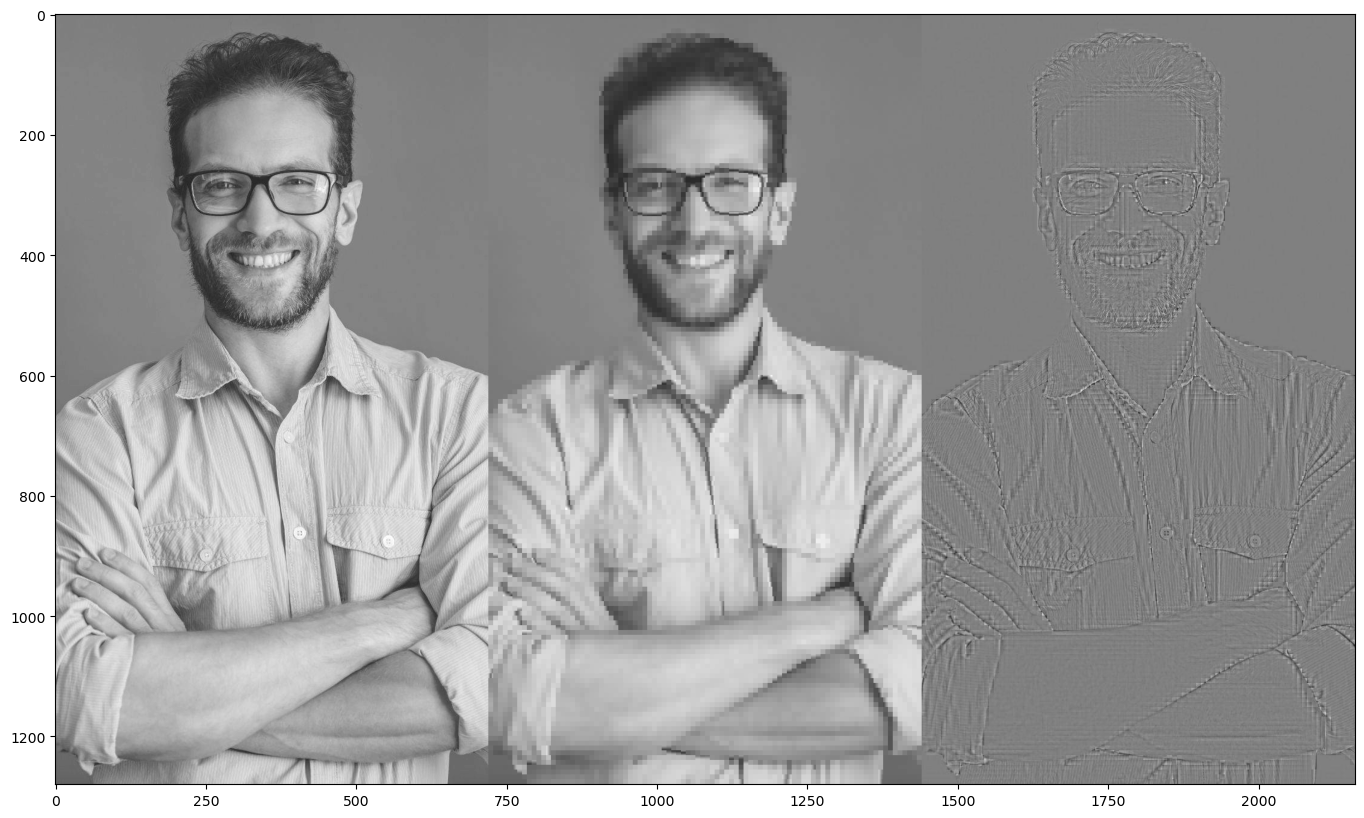

In [22]:
patch_size = 8  #8x8 patch
I_comp = np.zeros_like(I)
for i in range(0,I.shape[0],patch_size):
    for j in range(0,I.shape[1],patch_size):
        I_comp[i:(i+patch_size),j:(j+patch_size)] = idct2(I_thresh[i:(i+patch_size),j:(j+patch_size)])

#Plot decompressed (reconstructed image)
plt.figure(figsize=(30,10))
plt.imshow(I_comp,cmap='gray')
plt.imshow(np.hstack((I,I_comp, I-I_comp+0.5)), cmap='gray', vmin=0, vmax=1)

#Compute size of compressed image and compression ratio
frac_nonzero = np.sum(I_thresh != 0.0)/I.size
print("Keeping %.2f%% of DCT coefficients"%(100*frac_nonzero))
print('Compression ratio: %.1f:1'%(1/frac_nonzero))

#Compute Peak Signal to Noise Ratio (PSNR)
MSE = np.sum((I-I_comp)**2)/I.size
PSNR = 10*np.log10(np.max(I)**2/MSE)
print('PSNR: %.2f dB'%PSNR)


## Image compression using fuzzy logic

In [1]:
# import opencv
import cv2
  
# Load the input image
image = cv2.imread('C:/Users/user/Downloads/man1.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)

-1

In [2]:
from PIL import Image
img = Image.open('C:/Users/user/Downloads/man1.jpg').convert('L')
img.save('man_grey.png')

In [3]:
img = Image.open('man_grey.png')

In [4]:
img.show()

In [5]:
image = cv2.imread('C:/Users/user/Downloads/man_grey.png')

Data type: float32
Pixel intensity range: (0,1)
(1280, 720)


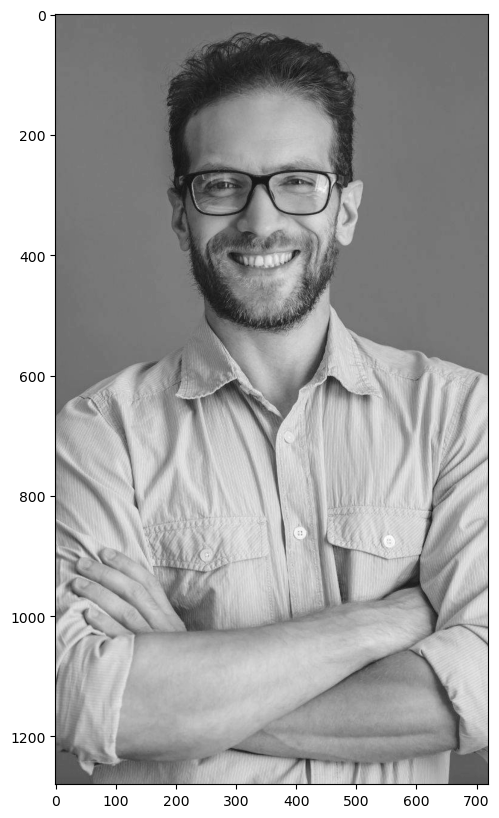

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import graphlearning as gl

#github = 'https://github.com/jwcalder/TestImages/raw/main/'
image = 'C:/Users/user/Downloads/man_grey.png'

# Load image
I = plt.imread(image)
plt.figure(figsize=(10,10))
plt.imshow(I, cmap='gray')

# Check data type of image
print('Data type: '+str(I.dtype))
print('Pixel intensity range: (%d,%d)'%(I.min(),I.max()))

# Print image shape
print(I.shape)




In [7]:
def dct2(f):
    """2D Discrete Cosine Transform

    Args:
        f: Square array

    Returns: 
        2D DCT of f
    """
    return dct(dct(f, axis=0, norm='ortho'), axis=1, norm='ortho')

def idct2(f):
    """2D Inverse Discrete Cosine Transform

    Args:
        f: Square array

    Returns: 
        2D Inverse DCT of f
    """
    return idct(idct(f, axis=0, norm='ortho'), axis=1, norm='ortho')



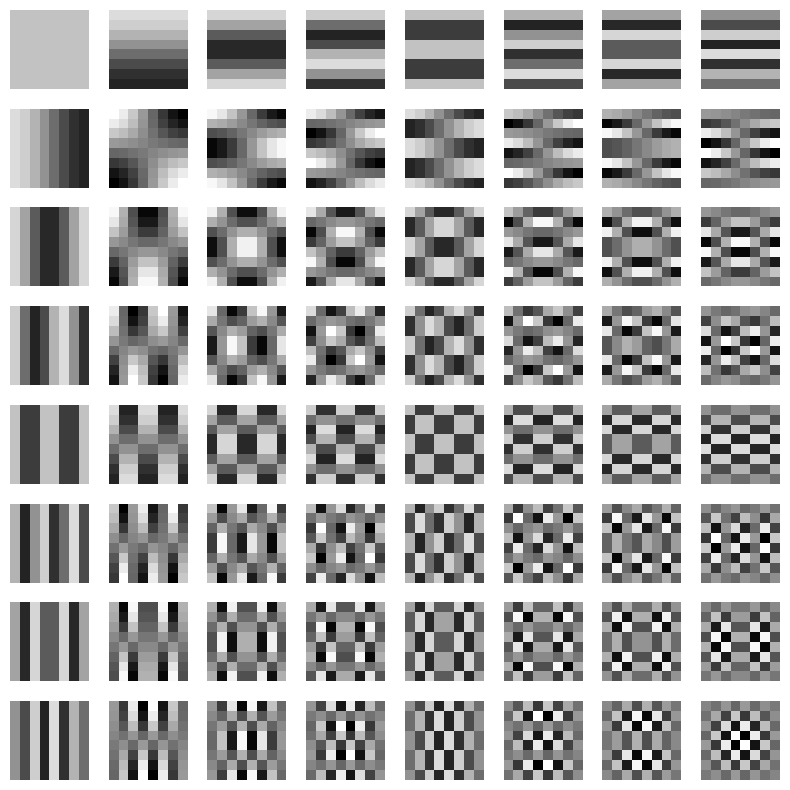

In [8]:
dct_basis = np.zeros((64, 64))
k = 0
for i in range(8):
    for j in range(8):
        g = np.zeros((8, 8))
        g[i, j] = 1
        dct_basis[k, :] = idct2(g).flatten()
        k += 1

dct_basis = dct_basis / np.max(np.absolute(dct_basis))
gl.utils.image_grid(dct_basis, n_rows=8, n_cols=8)



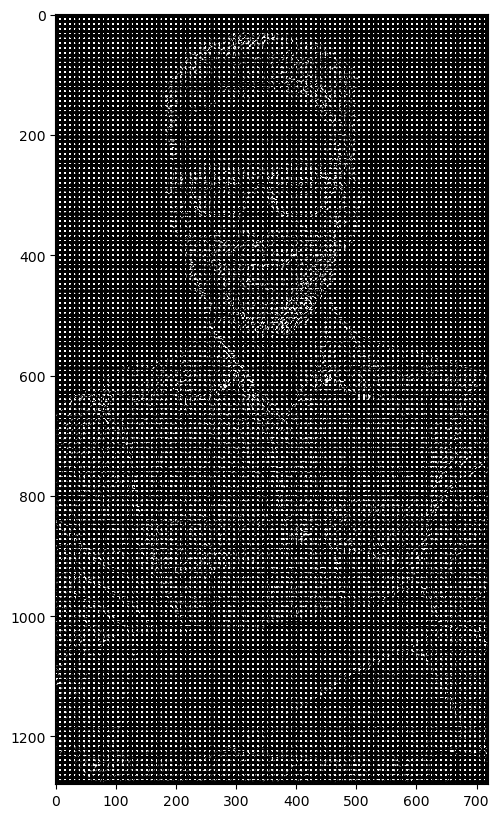

In [9]:
patch_size = 8  # 8x8 patch
I_dct = np.zeros_like(I)
for i in range(0, I.shape[0], patch_size):
    for j in range(0, I.shape[1], patch_size):
        I_dct[i:(i+patch_size), j:(j+patch_size)] = dct2(I[i:(i+patch_size), j:(j+patch_size)])

plt.figure(figsize=(10, 10))
plt.imshow(I_dct, cmap='gray', vmin=0, vmax=np.max(I_dct)*0.01)



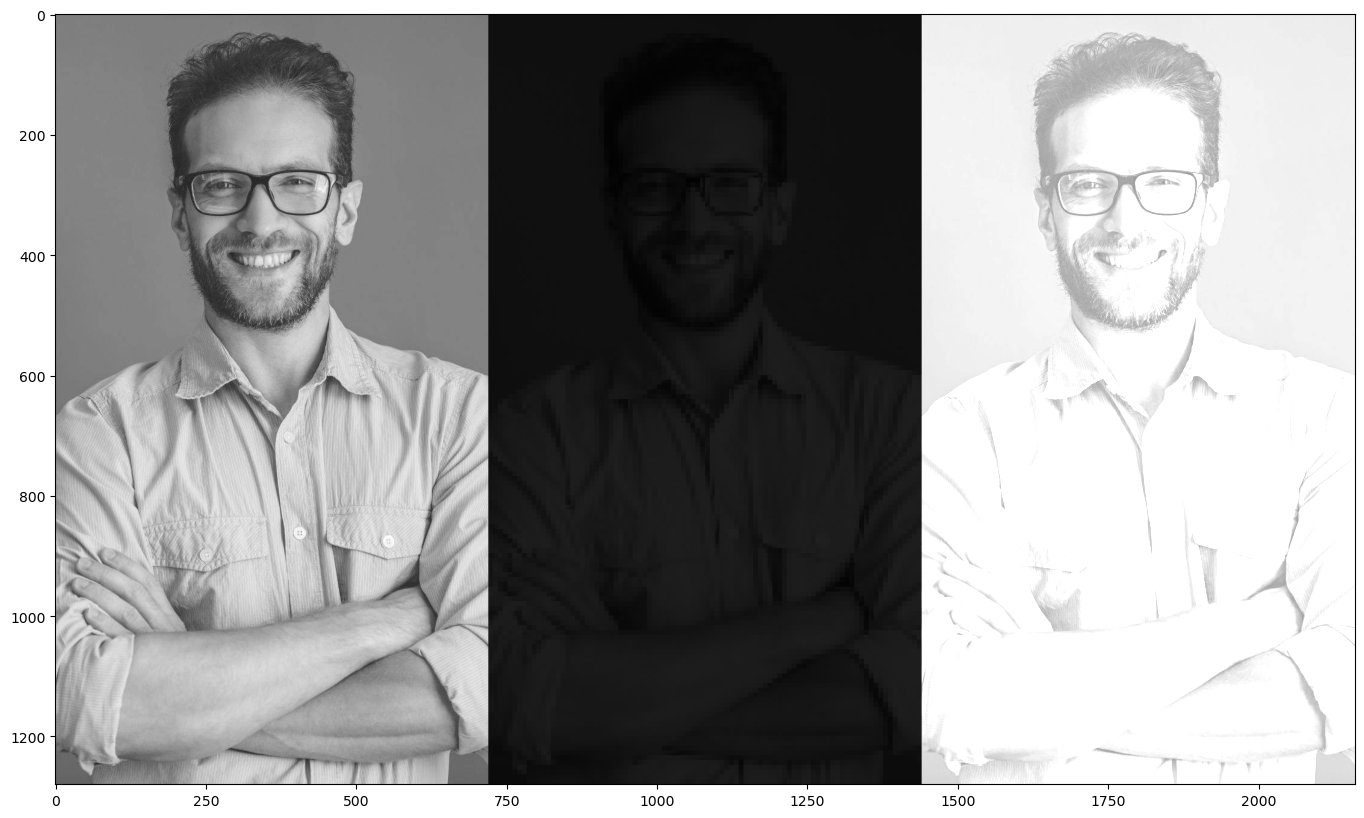

In [10]:
thresh = 0.1

# Fuzzy logic for thresholding
def fuzzy_threshold(x, threshold, max_val):
    if x < threshold:
        return 0
    elif x >= max_val:
        return 1
    else:
        return (x - threshold) / (max_val - threshold)

fuzzy_threshold_vec = np.vectorize(fuzzy_threshold)

I_thresh = fuzzy_threshold_vec(np.absolute(I_dct), thresh * np.max(np.absolute(I_dct)), np.max(np.absolute(I_dct)))

patch_size = 8  # 8x8 patch
I_comp = np.zeros_like(I)
for i in range(0, I.shape[0], patch_size):
    for j in range(0, I.shape[1], patch_size):
        I_comp[i:(i+patch_size), j:(j+patch_size)] = idct2(I_thresh[i:(i+patch_size), j:(j+patch_size)])

# Plot decompressed (reconstructed image)
plt.figure(figsize=(30, 10))
plt.imshow(I_comp, cmap='gray')
plt.imshow(np.hstack((I, I_comp, I-I_comp+0.5)), cmap='gray', vmin=0, vmax=1)

# Compute size of compressed image and compression ratio
#frac_nonzero = np

In [11]:
#Compute size of compressed image and compression ratio
frac_nonzero = np.sum(I_thresh != 0.0)/I.size
print("Keeping %.2f%% of DCT coefficients"%(100*frac_nonzero))
print('Compression ratio: %.1f:1'%(1/frac_nonzero))

#Compute Peak Signal to Noise Ratio (PSNR)
MSE = np.sum((I-I_comp)**2)/I.size
PSNR = 10*np.log10(np.max(I)**2/MSE)
print('PSNR: %.2f dB'%PSNR)

Keeping 1.61% of DCT coefficients
Compression ratio: 62.3:1
PSNR: 5.09 dB
